이번에 설치해야 할 모듈은 pillow와 requests 이다.  
pillow는 파이썬에서 이미지를 핸들링하는 모듈이고, requests는 http 관련 요청을 처리하는 모듈이다.  
```
pip install pillow

pip install requests
```
설치는 쉬우나, 우리가 학습하고 있는 study36 환경을 활성화해서 그 안에서 설치해야 한다.  
(나는 vscode에서 프롬프트의 기본 프로필을 anaconda:study36으로 지정해서 바로 설치하였다.)  

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

이번에 추가하는 import는 matplotlib의 image이다.  
jpg 등의 이미지 파일을 다룰 수 있는 모듈이다.  
이를 이용해서 face_detection_test_01.jpg라는 이름으로 data폴더에 저장된 이미지를 읽어보겠다.  
우리는 이 사진을 https://pxhere.com/ko/photo/950788 또는, 이 책의 github 페이지인 https://github.com/PinktWink/playing_data에서 얻을 수 있다.

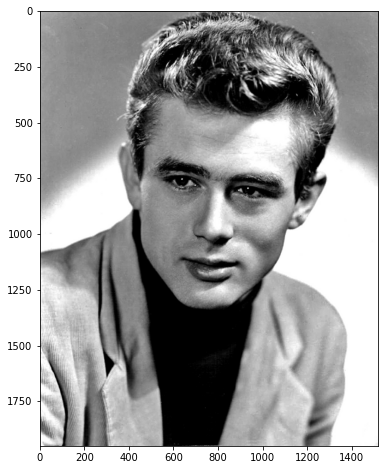

In [2]:
img = mpimg.imread('./data/face_detection_test_01.jpg')

plt.figure(figsize=(10, 8))
plt.imshow(img)
plt.show()

In [3]:
import requests
client_id="fFs_uErHvCbOX3GdrzEj"
client_secret="BvThmXhJXe"

url = "https://openapi.naver.com/v1/vision/celebrity"
files = {'image' : open('./data/face_detection_test_01.jpg', 'rb')}
headers = {'X-Naver-Client-Id' : client_id, 'X-Naver-Client-Secret' : client_secret}

response = requests.post(url, files = files, headers = headers)

4장에서 진행한 대로, client ID/secret을 설정하고, url이 닮은 유명인 찾는 url을 사용한다.  
해당 url과 사용법은 http://developers.naver.com/docs/clova/api/CFR/API_Guide.md 에 있다.  
4장의 내용과 다른 점은 인식해야 할 사진을 보내야(post) 한다는 것이다.  
그 방법은 requests의 post 기능을 이용해 사진을 보내는 것이다.  
네이버에서는 사진 한 장이 최대 2MB보다 작아야 한다.

In [4]:
import json
parsed = json.loads(response.text)
print(json.dumps(parsed, indent = 4, sort_keys = False, ensure_ascii=False))

{
    "info": {
        "size": {
            "width": 1518,
            "height": 1950
        },
        "faceCount": 1
    },
    "faces": [
        {
            "celebrity": {
                "value": "정우성",
                "confidence": 0.276358
            }
        }
    ]
}


변수 response에 저장된 코드 3의 결과를 json으로 읽고(loads) 들여쓰기(indent)를 설정해서 dumps라는 명령을 사용하면 코드 4의 결과처럼 보기 좋게 변환해 준다.  
여기서 ensure_ascii=False를 사용하면 utf-8로 인코딩된 한글을 제대로 표시해준다.  
face_detection_test_01.jpg 사진을 네이버 유명인 인식 API에 적용한 결과는 책에서는 이병헌 배우와 17.4% 닮았다고 나왔다고 하지만, 현재 검색결과에서는 정우성 배우와 27.63% 닮았다고 나온다.  
네이버 얼굴인식에서 유명인 인식 API는 한국 유명인을 찾는다. 그래서 이렇게 결과가 타나나는 것이다.  
또 찾은 얼굴이 하나인 것도 facecount에서 나타난다.

In [5]:
url = "https://openapi.naver.com/v1/vision/face"
files = {'image' : open('./data/face_detection_test_01.jpg', 'rb')}
headers = {'X-Naver-Client-Id' : client_id, 'X-Naver-Client-Secret' : client_secret}

response = requests.post(url, files = files, headers = headers)

parsed = json.loads(response.text)
print(json.dumps(parsed, indent=4, sort_keys=False, ensure_ascii=False))

{
    "info": {
        "size": {
            "width": 1518,
            "height": 1950
        },
        "faceCount": 1
    },
    "faces": [
        {
            "roi": {
                "x": 467,
                "y": 617,
                "width": 678,
                "height": 678
            },
            "landmark": {
                "leftEye": {
                    "x": 634,
                    "y": 746
                },
                "rightEye": {
                    "x": 952,
                    "y": 797
                },
                "nose": {
                    "x": 760,
                    "y": 981
                },
                "leftMouth": {
                    "x": 625,
                    "y": 1105
                },
                "rightMouth": {
                    "x": 902,
                    "y": 1133
                }
            },
            "gender": {
                "value": "male",
                "confidence": 0.999999
            },
       

이번에는 그냥 얼굴 인식 api를 사용해보자.  url만 바뀌는 것을 제외하면 나머지는 동일하다.  정말 상세한 정보가 나타나는 것을 알 수 있다.  
전체 사진의 크기가 발견된 얼굴의 개수, 그리고, 얼굴의 위치(roi: region of interest)와 눈, 코, 입의 위치, 성별(gender), 나이(age), 감정(gender), 각도(pose)까지 나타난다.  
face_detection_test_01.jpg 사진은 99.9%로 남성, 16.08%의 확률로 나이가 26~30세라는 것까지 나타난다.